In [1]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = 20
pd.set_option('display.max_colwidth',500)
# Since Our Data is Big so Lets see in small

import numpy as np

# For Pyspark 
from pyspark.sql import SparkSession

## df = Panda DataFrame ds = Spark Data Frame

In [2]:
df = pd.read_csv("../datas_not_to_upload/989.hg19_multianno.txt.intervar", sep="\t", low_memory=False)

In [3]:
df.style.set_table_attributes('style="font-size:10px"')
df.head()

,#Chr,Start,End,Ref,Alt,Ref.Gene,Func.refGene,ExonicFunc.refGene,Gene.ensGene,avsnp147,...,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,13868,13868,A,G,DDX11L1,ncRNA_exonic,.,ENSG00000223972,rs796086906,...,.,.,.,.,"AFR:0.0225,AMR:0.1277,EAS:0.4593,FIN:0.1137,NFE:0.1564,OTH:0.1580,ASJ:0.1098",.,.,NaN,NaN,1
1,1,13868,13868,A,G,LOC102725121,ncRNA_exonic,.,ENSG00000223972,rs796086906,...,.,.,.,.,"AFR:0.0225,AMR:0.1277,EAS:0.4593,FIN:0.1137,NFE:0.1564,OTH:0.1580,ASJ:0.1098",.,.,NaN,NaN,1
2,1,15274,15274,A,G,WASH7P,ncRNA_intronic,.,ENSG00000227232,rs62636497,...,.,.,Name=MIR3,.,"AFR:0.3824,AMR:0.3197,EAS:0.5234,FIN:0.3506,NFE:0.3551,OTH:0.3420,ASJ:0.2816",.,.,NaN,NaN,1
3,1,15820,15820,G,T,WASH7P,ncRNA_exonic,.,ENSG00000227232,rs2691315,...,.,.,.,.,"AFR:0.4290,AMR:0.1197,EAS:0.0696,FIN:0.0523,NFE:0.1128,OTH:0.1421,ASJ:0.1389",.,.,NaN,NaN,1
4,1,15903,15903,-,C,WASH7P,ncRNA_exonic,.,ENSG00000227232;ENSG00000227232,rs557514207,...,.,.,.,.,"AFR:0.2031,AMR:0.5973,EAS:0.9771,FIN:0.8081,NFE:0.7690,OTH:0.6758,ASJ:0.6702",.,.,NaN,NaN,1


In [4]:
df.dtypes # Columns name with Data Type 

#Chr                                 object
Start                                 int64
End                                   int64
Ref                                  object
Alt                                  object
Ref.Gene                             object
Func.refGene                         object
ExonicFunc.refGene                   object
Gene.ensGene                         object
avsnp147                             object
AAChange.ensGene                     object
AAChange.refGene                     object
clinvar: Clinvar                     object
 InterVar: InterVar and Evidence     object
Freq_gnomAD_genome_ALL               object
Freq_esp6500siv2_all                 object
Freq_1000g2015aug_all                object
CADD_raw                             object
CADD_phred                           object
SIFT_score                           object
GERP++_RS                            object
phyloP46way_placental                object
dbscSNV_ADA_SCORE               

## Loading By Using Pyspark

In [5]:
spark = SparkSession.builder.appName("Inter Var data analysis")\
                    .config("spark.some.config.option", "some-value")\
                    .getOrCreate()

In [6]:
#df = spark.read.format("com.databricks.spark.csv").\
#            options(header = "true", inferschema = "true").\
#            load("../datas_not_to_upload/989.hg19_multianno.txt.intervar")

# Load Data Frame from CSV
ds = spark.read.csv("../datas_not_to_upload/989.hg19_multianno.txt.intervar", header= True, inferSchema= True,sep="\t")

In [7]:
ds.show() 

+----+-----+-----+---+---+------------+--------------+------------------+--------------------+-----------+----------------+----------------+-----------------+---------------------------------+----------------------+--------------------+---------------------+--------+----------+----------+---------+---------------------+-----------------+----------------+---------------+------------------+----------------+-------------+-----------------------+----+-------------+-----------+-----+---------+
|#Chr|Start|  End|Ref|Alt|    Ref.Gene|  Func.refGene|ExonicFunc.refGene|        Gene.ensGene|   avsnp147|AAChange.ensGene|AAChange.refGene|clinvar: Clinvar | InterVar: InterVar and Evidence |Freq_gnomAD_genome_ALL|Freq_esp6500siv2_all|Freq_1000g2015aug_all|CADD_raw|CADD_phred|SIFT_score|GERP++_RS|phyloP46way_placental|dbscSNV_ADA_SCORE|dbscSNV_RF_SCORE|Interpro_domain|AAChange.knownGene|            rmsk|MetaSVM_score|Freq_gnomAD_genome_POPs|OMIM|Phenotype_MIM|OrphaNumber|Orpha|Otherinfo|
+----+-----+

In [8]:
ds.printSchema() # Column Name

root
 |-- #Chr: string (nullable = true)
 |-- Start: integer (nullable = true)
 |-- End: integer (nullable = true)
 |-- Ref: string (nullable = true)
 |-- Alt: string (nullable = true)
 |-- Ref.Gene: string (nullable = true)
 |-- Func.refGene: string (nullable = true)
 |-- ExonicFunc.refGene: string (nullable = true)
 |-- Gene.ensGene: string (nullable = true)
 |-- avsnp147: string (nullable = true)
 |-- AAChange.ensGene: string (nullable = true)
 |-- AAChange.refGene: string (nullable = true)
 |-- clinvar: Clinvar : string (nullable = true)
 |--  InterVar: InterVar and Evidence : string (nullable = true)
 |-- Freq_gnomAD_genome_ALL: string (nullable = true)
 |-- Freq_esp6500siv2_all: string (nullable = true)
 |-- Freq_1000g2015aug_all: string (nullable = true)
 |-- CADD_raw: string (nullable = true)
 |-- CADD_phred: string (nullable = true)
 |-- SIFT_score: string (nullable = true)
 |-- GERP++_RS: string (nullable = true)
 |-- phyloP46way_placental: string (nullable = true)
 |-- dbscS

## Checking Missing Value Using PySpark

In [9]:
from pyspark.sql.functions import count

def my_count(ds):
    " Spark data Frame"
    ds.agg(*[count(c).alias(c) for c in ds.columns]).show()

In [10]:
# fill na value in spark Data Frame
# df.na.fill()   # Replace Null Values
# df.na.drop()  # Dropping any rows with null Valus
#df.where()     # Filter rows using the given condition
# df.filter() # Filters rows using the given Condition
# df.distinct() # Returns distinct rows in this DataFrame
# df.sample() # Returns a sampld subset of this DataDrame
# df.sampleBay() # Returns a stratified sample without replacement


#### Joining the data Using Pyspark

In [11]:
# Data Join
# left.join(right, key, how = "*")  # * = left, right, inner, full


In [12]:
ds.describe()  # Describe the data Frame Using Spark 
# Our  data set is not feasible RIght Now


DataFrame[summary: string, #Chr: string, Start: string, End: string, Ref: string, Alt: string, Ref.Gene: string, Func.refGene: string, ExonicFunc.refGene: string, Gene.ensGene: string, avsnp147: string, AAChange.ensGene: string, AAChange.refGene: string, clinvar: Clinvar : string,  InterVar: InterVar and Evidence : string, Freq_gnomAD_genome_ALL: string, Freq_esp6500siv2_all: string, Freq_1000g2015aug_all: string, CADD_raw: string, CADD_phred: string, SIFT_score: string, GERP++_RS: string, phyloP46way_placental: string, dbscSNV_ADA_SCORE: string, dbscSNV_RF_SCORE: string, Interpro_domain: string, AAChange.knownGene: string, rmsk: string, MetaSVM_score: string, Freq_gnomAD_genome_POPs: string, OMIM: string, Phenotype_MIM: string, OrphaNumber: string, Orpha: string, Otherinfo: string]

In [13]:
len(ds.columns)

34

In [14]:
ds.sample(fraction = 0.001).limit(10).toPandas()

,#Chr,Start,End,Ref,Alt,Ref.Gene,Func.refGene,ExonicFunc.refGene,Gene.ensGene,avsnp147,...,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,715348,715348,T,G,LOC100288069,intergenic,.,ENSG00000237491,rs3131984,...,.,.,Name=AluJb,.,"AFR:0.9995,AMR:1,EAS:1,FIN:1,NFE:1,OTH:1,ASJ:1",.,.,None,None,1
1,1,884041,884041,-,CCTGGCTGCACCCTGGTCCCCCTGGTCCCTTTGGCCCTGCA,NOC2L,intronic,.,ENSG00000188976,.,...,.,.,.,.,"AFR:.,AMR:.,EAS:.,FIN:.,NFE:.,OTH:.,ASJ:.",610770,.,None,None,1
2,1,2021197,2021197,A,G,PRKCZ,intronic,.,ENSG00000067606,rs6699586,...,.,.,Name=MLT1C,.,"AFR:0.4837,AMR:0.2955,EAS:0.6309,FIN:0.2253,NFE:0.1814,OTH:0.2351,ASJ:0.2848",176982,.,None,None,1
3,1,2902573,2902573,-,TCCATCCTCCATCC,TTC34,intergenic,.,ENSG00000231630;ENSG00000169717,rs149881154,...,.,.,Name=(TCCA)n,.,"AFR:.,AMR:.,EAS:.,FIN:.,NFE:.,OTH:.,ASJ:.",.,.,None,None,1
4,1,2948178,2948178,T,C,PRDM16-DT,intergenic,.,ENSG00000169717;ENSG00000177133,rs10909864,...,.,.,.,.,"AFR:0.3827,AMR:0.3067,EAS:0.4451,FIN:0.1413,NFE:0.1665,OTH:0.1711,ASJ:0.1159",.,.,None,None,1
5,1,4077707,4077707,G,A,LINC01777,intergenic,.,ENSG00000233304;ENSG00000229280,rs4654601,...,.,.,.,.,"AFR:0.1619,AMR:0.2002,EAS:0.1945,FIN:0.2927,NFE:0.3217,OTH:0.3020,ASJ:0.2781",.,.,None,None,1
6,1,4147136,4147136,C,G,LINC01346,intergenic,.,ENSG00000233304;ENSG00000229280,rs55774050,...,.,.,.,.,"AFR:0.7938,AMR:0.9303,EAS:0.9050,FIN:0.8972,NFE:0.8989,OTH:0.8939,ASJ:0.8477",.,.,None,None,1
7,1,4195991,4195991,T,C,LINC01777,intergenic,.,ENSG00000233304;ENSG00000229280,rs142182438,...,.,.,Name=MSTB2,.,"AFR:0.0448,AMR:0.0432,EAS:0.0240,FIN:0.0061,NFE:0.0127,OTH:0.0213,ASJ:0.0432",.,.,None,None,1
8,1,4291262,4291262,T,C,LINC01777,intergenic,.,ENSG00000229280;ENSG00000235054,rs6426406,...,.,.,Name=AluJb,.,"AFR:0.6496,AMR:0.7380,EAS:0.5105,FIN:0.7464,NFE:0.7345,OTH:0.7434,ASJ:0.6733",.,.,None,None,1
9,1,4441949,4441949,C,T,LINC01777,intergenic,.,ENSG00000229280;ENSG00000235054,rs12036357,...,.,.,Name=MER11A,.,"AFR:0.2129,AMR:0.0859,EAS:0.3335,FIN:0.0201,NFE:0.0117,OTH:0.0449,ASJ:0.0166",.,.,None,None,1


### Pandas

In [15]:
df.head()

,#Chr,Start,End,Ref,Alt,Ref.Gene,Func.refGene,ExonicFunc.refGene,Gene.ensGene,avsnp147,...,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,13868,13868,A,G,DDX11L1,ncRNA_exonic,.,ENSG00000223972,rs796086906,...,.,.,.,.,"AFR:0.0225,AMR:0.1277,EAS:0.4593,FIN:0.1137,NFE:0.1564,OTH:0.1580,ASJ:0.1098",.,.,NaN,NaN,1
1,1,13868,13868,A,G,LOC102725121,ncRNA_exonic,.,ENSG00000223972,rs796086906,...,.,.,.,.,"AFR:0.0225,AMR:0.1277,EAS:0.4593,FIN:0.1137,NFE:0.1564,OTH:0.1580,ASJ:0.1098",.,.,NaN,NaN,1
2,1,15274,15274,A,G,WASH7P,ncRNA_intronic,.,ENSG00000227232,rs62636497,...,.,.,Name=MIR3,.,"AFR:0.3824,AMR:0.3197,EAS:0.5234,FIN:0.3506,NFE:0.3551,OTH:0.3420,ASJ:0.2816",.,.,NaN,NaN,1
3,1,15820,15820,G,T,WASH7P,ncRNA_exonic,.,ENSG00000227232,rs2691315,...,.,.,.,.,"AFR:0.4290,AMR:0.1197,EAS:0.0696,FIN:0.0523,NFE:0.1128,OTH:0.1421,ASJ:0.1389",.,.,NaN,NaN,1
4,1,15903,15903,-,C,WASH7P,ncRNA_exonic,.,ENSG00000227232;ENSG00000227232,rs557514207,...,.,.,.,.,"AFR:0.2031,AMR:0.5973,EAS:0.9771,FIN:0.8081,NFE:0.7690,OTH:0.6758,ASJ:0.6702",.,.,NaN,NaN,1


In [16]:
import pandas_profiling as pp
import seaborn as sns

In [17]:
#pp.ProfileReport(df)  # Since Our Data Set is Too Big It will Take long Time 

In [18]:
genes_gestational = ["EBF1", "EEFSEC", "AGTR2", "WNT4", "ADCY5", "RAP2C"]
genes_premature = ["EB1", "EEFSEC", "AGTR2"]

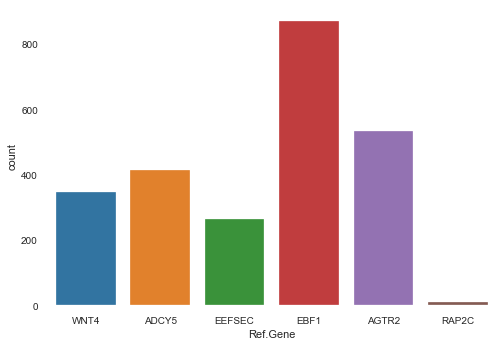

In [19]:
sns.countplot(df[df["Ref.Gene"].isin(genes_gestational)]["Ref.Gene"])

In [20]:
df.columns

Index(['#Chr', 'Start', 'End', 'Ref', 'Alt', 'Ref.Gene', 'Func.refGene',
       'ExonicFunc.refGene', 'Gene.ensGene', 'avsnp147', 'AAChange.ensGene',
       'AAChange.refGene', 'clinvar: Clinvar ',
       ' InterVar: InterVar and Evidence ', 'Freq_gnomAD_genome_ALL',
       'Freq_esp6500siv2_all', 'Freq_1000g2015aug_all', 'CADD_raw',
       'CADD_phred', 'SIFT_score', 'GERP++_RS', 'phyloP46way_placental',
       'dbscSNV_ADA_SCORE', 'dbscSNV_RF_SCORE', 'Interpro_domain',
       'AAChange.knownGene', 'rmsk', 'MetaSVM_score',
       'Freq_gnomAD_genome_POPs', 'OMIM', 'Phenotype_MIM', 'OrphaNumber',
       'Orpha', 'Otherinfo'],
      dtype='object')

In [21]:
#df["clinvar: Clinvar "].unique()
#df['ExonicFunc.refGene'].unique()
#df['Func.refGene'].unique()
#df[' InterVar: InterVar and Evidence '].nunique()
#df['Freq_gnomAD_genome_ALL'].nunique() # More than 13470
#df['Freq_esp6500siv2_all']
#df['CADD_raw'].nunique() # 5805
#df[' InterVar: InterVar and Evidence '].unique()

In [22]:
#df.head().T
#df["clinvar: Clinvar "]

0          clinvar: UNK 
1          clinvar: UNK 
2          clinvar: UNK 
3          clinvar: UNK 
4          clinvar: UNK 
               ...      
6533866    clinvar: UNK 
6533867    clinvar: UNK 
6533868    clinvar: UNK 
6533869    clinvar: UNK 
6533870    clinvar: UNK 
Name: clinvar: Clinvar , Length: 6533871, dtype: object